In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_excel("Folds5x2_pp.xlsx")

In [3]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


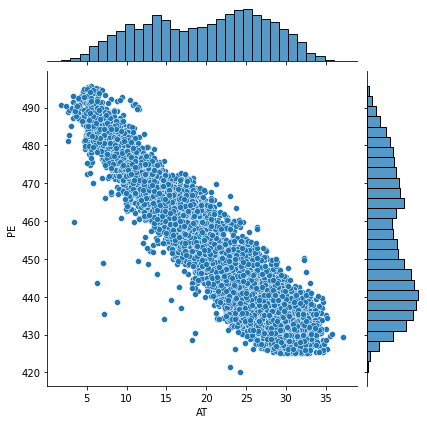

In [5]:
sns.jointplot(data["AT"],data["PE"])

In [6]:
data.drop("RH",axis=1,inplace=True)

In [7]:
data

,AT,V,AP,PE
0,14.96,41.76,1024.07,463.26
1,25.18,62.96,1020.04,444.37
2,5.11,39.40,1012.16,488.56
3,20.86,57.32,1010.24,446.48
4,10.82,37.50,1009.23,473.90
...,...,...,...,...
9563,16.65,49.69,1014.01,460.03
9564,13.19,39.18,1023.67,469.62
9565,31.32,74.33,1012.92,429.57
9566,24.48,69.45,1013.86,435.74


In [34]:
data = data.sample(frac=1)

In [35]:
X = data[["AT","AP"]]
y = data["PE"]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=78)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
model.coef_

array([-2.11343801,  0.14172044])

In [39]:
model.intercept_

352.2947188116192

In [40]:

y_pred = model.predict(X_test)

In [41]:
y_pred

array([448.80752797, 438.81908796, 453.42783544, ..., 480.95277095,
       468.70954354, 431.73001599])

# test accuracy

In [43]:
import math
from sklearn.metrics import r2_score, mean_squared_error
print("R2_score = {}".format(r2_score(y_test, y_pred)))
print("mean square error = {}".format(mean_squared_error(y_test, y_pred)))
print("root mean square error = {}".format(math.sqrt(mean_squared_error(y_test, y_pred))))

R2_score = 0.9063731233793502
mean square error = 27.80204575853984
root mean square error = 5.272764527128046


# train Accuary

In [46]:
y_pred_train = model.predict(X_train)

print("R2_score = {}".format(r2_score(y_train, y_pred_train)))
print("mean square error = {}".format(mean_squared_error(y_train, y_pred_train)))
print("root mean square error = {}".format(math.sqrt(mean_squared_error(y_train, y_pred_train))))

R2_score = 0.8993782274255715
mean square error = 29.160507752184724
root mean square error = 5.40004701388652
